# KNN을 활용한 주가예측 코드

In [1]:
!pip install finance-datareader
!pip install -U finance-datareader # 업데이트

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 한국거래소에 상장된 모든 종목 리스트 가져오기
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')
df_krx.head()

Symbol  Market    Name           Sector             Industry ListingDate  \
0  060310  KOSDAQ      3S         전자부품 제조업          반도체 웨이퍼 캐리어  2002-04-23   
1  095570   KOSPI  AJ네트웍스  산업용 기계 및 장비 임대업  렌탈(파렛트, OA장비, 건설장비)  2015-08-21   
2  006840   KOSPI   AK홀딩스           기타 금융업                 지주사업  1999-08-11   
3  054620  KOSDAQ  APS홀딩스           기타 금융업          인터넷 트래픽 솔루션  2001-12-04   
4  265520  KOSDAQ   AP시스템    특수 목적용 기계 제조업          디스플레이 제조 장비  2017-04-07   

  SettleMonth     Representative                       HomePage Region  
0         03월                김세완           http://www.3sref.com  서울특별시  
1         12월           박대현, 손삼달         http://www.ajnet.co.kr  서울특별시  
2         12월  채형석, 이석주(각자 대표이사)  http://www.aekyunggroup.co.kr  서울특별시  
3         12월                정기로   http://www.apsholdings.co.kr    경기도  
4         12월                김영주     http://www.apsystems.co.kr    경기도

In [34]:
df = fdr.DataReader('036570','2020-01-01', '2022-04-12') # NCsoft 주가를 2020년부터 현시점까지 가져온다

In [35]:
df = df.fillna(0)
df

Open    High     Low   Close  Volume    Change
Date                                                        
2020-01-02  542000  545000  539000  541000   40246  0.000000
2020-01-03  547000  568000  542000  565000  112404  0.044362
2020-01-06  562000  587000  562000  579000  107006  0.024779
2020-01-07  583000  596000  574000  594000   84378  0.025907
2020-01-08  587000  604000  584000  604000  109267  0.016835
...            ...     ...     ...     ...     ...       ...
2022-04-06  475000  483500  469000  474000   96750 -0.012500
2022-04-07  469000  471500  462000  462000  103079 -0.025316
2022-04-08  462500  466500  453500  458000   87055 -0.008658
2022-04-11  450500  459000  449000  453500   59322 -0.009825
2022-04-12  452000  461500  446500  458000  100684  0.009923

[563 rows x 6 columns]

In [6]:
import matplotlib.pyplot as plt

(array([737425., 737516., 737607., 737699., 737791., 737881., 737972.,
        738064., 738156., 738246.]),
 <a list of 10 Text major ticklabel objects>)

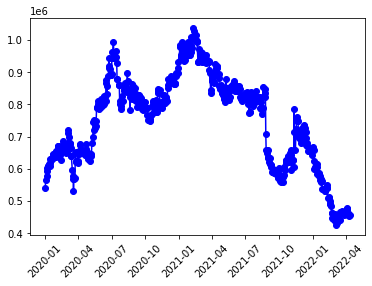

In [37]:
plt.plot(df['Close'], 'bo-')
plt.xticks(rotation=45)

## 학습데이터
 - input: Volume
 - output: changes/ 0,1

In [38]:
train = df[["Volume", "Change"]].to_numpy().tolist()

In [39]:
train

[[40246.0, 0.0],
 [112404.0, 0.0443622920517559],
 [107006.0, 0.024778761061946986],
 [84378.0, 0.02590673575129543],
 [109267.0, 0.01683501683501687],
 [71171.0, 0.0066225165562914245],
 [53031.0, 0.0],
 [66084.0, 0.009868421052631637],
 [64120.0, -0.006514657980456029],
 [56839.0, 0.014754098360655776],
 [79907.0, 0.02100161550888524],
 [49319.0, -0.0015822784810126667],
 [40779.0, -0.0015847860538826808],
 [59896.0, 0.0031746031746031633],
 [56758.0, 0.017405063291139333],
 [51057.0, 0.004665629860031162],
 [90471.0, -0.003095975232198178],
 [80218.0, 0.007763975155279601],
 [77424.0, 0.009244992295839749],
 [107016.0, -0.02900763358778624],
 [94982.0, 0.0062893081761006275],
 [71409.0, 0.02499999999999991],
 [69095.0, 0.0015243902439023849],
 [79693.0, 0.019786910197869156],
 [58755.0, 0.0029850746268655914],
 [120937.0, -0.0357142857142857],
 [120028.0, -0.006172839506172867],
 [172621.0, 0.009316770186335477],
 [156229.0, -0.03230769230769226],
 [157977.0, 0.044515103338632844],


In [40]:
df["Change_binary"] = df["Change"] > 0.0

In [41]:
df

Open    High     Low   Close  Volume    Change  Change_binary
Date                                                                       
2020-01-02  542000  545000  539000  541000   40246  0.000000          False
2020-01-03  547000  568000  542000  565000  112404  0.044362           True
2020-01-06  562000  587000  562000  579000  107006  0.024779           True
2020-01-07  583000  596000  574000  594000   84378  0.025907           True
2020-01-08  587000  604000  584000  604000  109267  0.016835           True
...            ...     ...     ...     ...     ...       ...            ...
2022-04-06  475000  483500  469000  474000   96750 -0.012500          False
2022-04-07  469000  471500  462000  462000  103079 -0.025316          False
2022-04-08  462500  466500  453500  458000   87055 -0.008658          False
2022-04-11  450500  459000  449000  453500   59322 -0.009825          False
2022-04-12  452000  461500  446500  458000  100684  0.009923           True

[563 rows x 7 columns]

In [42]:
df["Change_binary"].astype(int)

Date
2020-01-02    0
2020-01-03    1
2020-01-06    1
2020-01-07    1
2020-01-08    1
             ..
2022-04-06    0
2022-04-07    0
2022-04-08    0
2022-04-11    0
2022-04-12    1
Name: Change_binary, Length: 563, dtype: int64

In [43]:
target = df["Change_binary"].astype(int).to_numpy().tolist()

In [44]:
target

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
kn = KNeighborsClassifier()

In [30]:
kn.fit(train, target)

KNeighborsClassifier()

In [31]:
kn.score(train, target)

0.7104795737122558

In [45]:
kn.predict([[152405.0, 0]])

array([1])